ABSTRACT

The lab report examines a patient's characteristics and behavior dataset based on exercise, sleep, stress, diet, and body mass index (BMI).  We can segment patients into wellness profiles by applying unsupervised machine learning techniques. The goal of this lab report is to identify clusters for possible wellness interventions for patients focusing on excerise and BMI features. Using a dataset of 200 patients, we performed exploratory data analysis, K-Means clustering, and principal component analysis. The target clusters were re-evaluated using the within-cluster sum of squares (WCSS) and the Silhouette score.  The analysis revealed 6 patient clusters with differences in their BMI and exercise time in minutes per day.

*Keywords: K-Means clustering; PCA; Exercise; BMI;  Wellness profiles; WCSS; Silhouette score *


INTRODUCTION

Current global estimates indicate that one in three adults do not do enough physical activity. In 2019, an estimated 5 million chronic disease-related deaths were caused by more than an optimal elevated body mass index (BMI) score (World Health Organization (WHO), 2024). According to WHO, a BMI over 25 is considered overweight, and over 30 is considered obese (WHO, 2024). These alarming statistics call for a data-driven investigation.
By applying machine learning in healthcare, we can recommend personalized wellness programs. We analyze and extract insights from our data using K-Means clustering, we group patients across exercise and BMI features. This will allow us to group similar data points together and discover underlying patterns or structures (Sharma, 2019).We apply principal component analysis to reduce dimensionality as we aim to offer preventive healthcare programs based off these insights.





In [61]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


#METHODOLOGY

In [62]:
#Load data
df = pd.read_csv('simulated_health_wellness_data.csv')
df.head(5)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


##Data Exploration

In [63]:
#Instances & Features
df.shape

(200, 5)

In [64]:
#Check for missing values
df.isnull().sum()

,0
Exercise_Time_Min,0
Healthy_Meals_Per_Day,0
Sleep_Hours_Per_Night,0
Stress_Level,0
BMI,0


In [65]:
#Count & Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Level           200 non-null    int64  
 4   BMI                    200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [66]:
#Statistical Summary
df.describe().round(2)
#(Nwanganga, 2022)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.00,200.00,200.00,200.00,200.00
mean,29.59,2.88,6.93,5.00,25.15
std,9.31,1.82,1.42,2.61,5.07
min,3.80,0.00,1.78,1.00,12.50
25%,22.95,2.00,5.97,3.00,21.46
50%,29.96,3.00,6.97,5.00,25.16
75%,35.01,4.00,7.89,7.00,28.01
max,57.20,9.00,10.71,9.00,37.90


Text(0.5, 1.0, 'Figure 1. Relationship Between Healthy Meals Per Day and BMI')

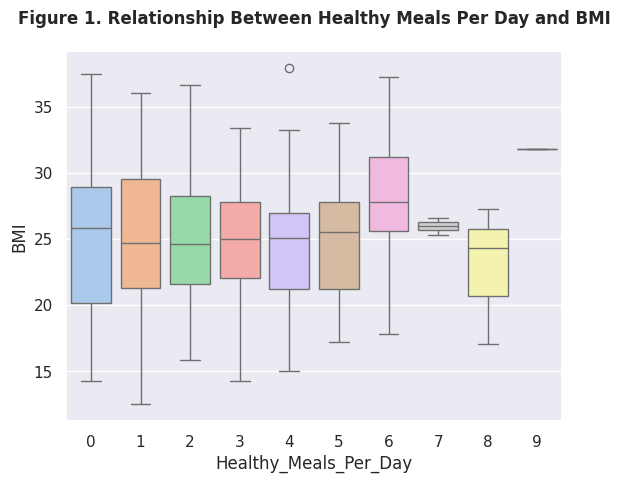

In [67]:
#Data visualization: Box plots
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='BMI', palette='pastel')
plt.title('Figure 1. Relationship Between Healthy Meals Per Day and BMI',
    fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

Text(0.5, 1.0, 'Figure 2. Relationship Between Exercise Time and Healthy Meals Per Day')

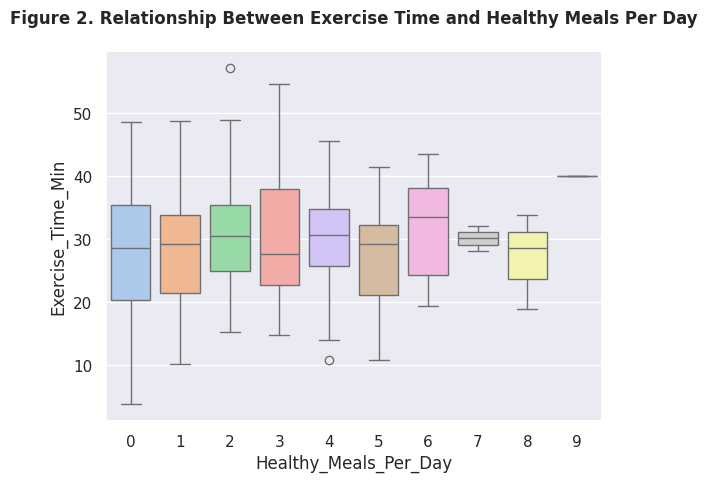

In [68]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Exercise_Time_Min', palette='pastel')
plt.title('Figure 2. Relationship Between Exercise Time and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 3. Stress Level and Healthy Meals Per Day')

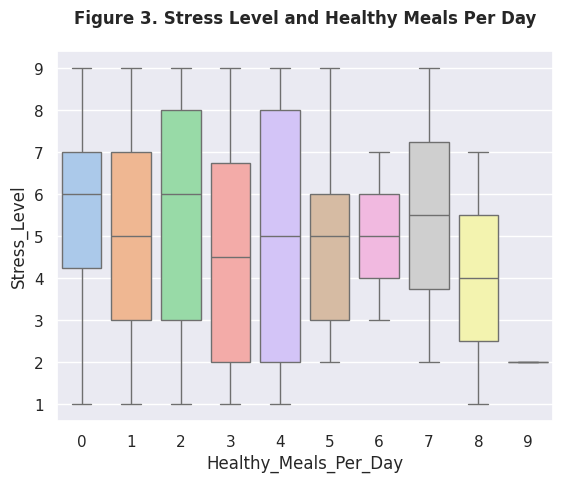

In [69]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Stress_Level', palette='pastel')
plt.title('Figure 3. Stress Level and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 4. Relationship between Sleep Hours and Healthy Meals Per Day')

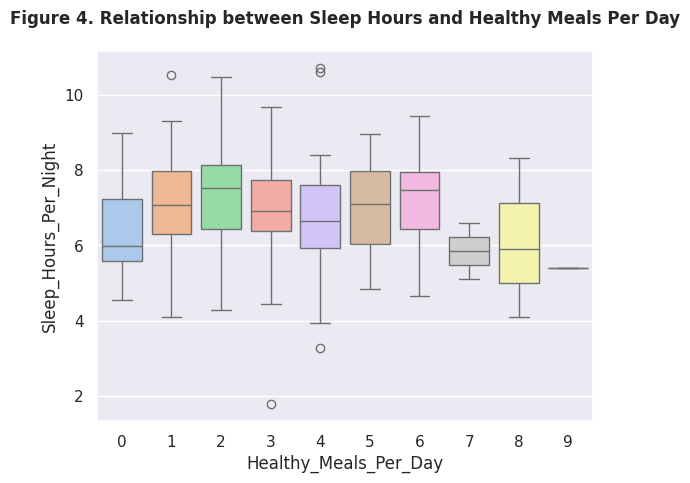

In [70]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Sleep_Hours_Per_Night', palette='pastel')
plt.title('Figure 4. Relationship between Sleep Hours and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 5. Relationship Between Sleep Hours and Healthy Meals Per Day')

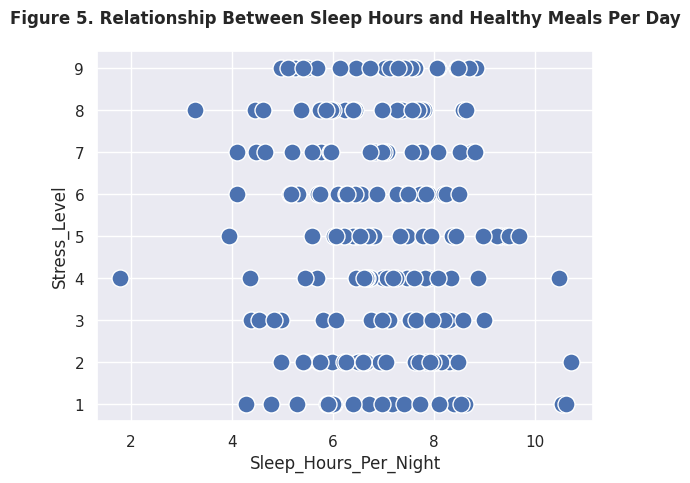

In [71]:
#Data visualization: Scatter plots
ax = sns.scatterplot(data=df, x='Sleep_Hours_Per_Night', y='Stress_Level', s=150)
plt.title('Figure 5. Relationship Between Sleep Hours and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

Text(0.5, 1.0, 'Figure 6. Relationship Between Healthy Meals Per Day and BMI')

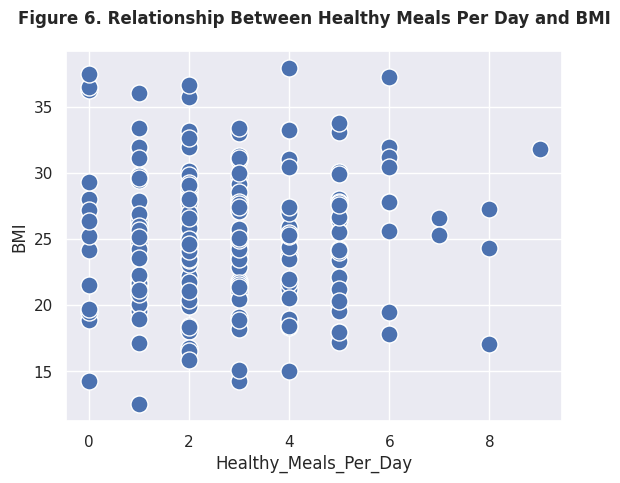

In [72]:
ax = sns.scatterplot(data=df, x='Healthy_Meals_Per_Day', y='BMI', s=150)
plt.title('Figure 6. Relationship Between Healthy Meals Per Day and BMI', fontweight='bold', loc='center', pad=20)


Text(0.5, 1.0, 'Figure 7. Relationship Between Stress Level and BMI')

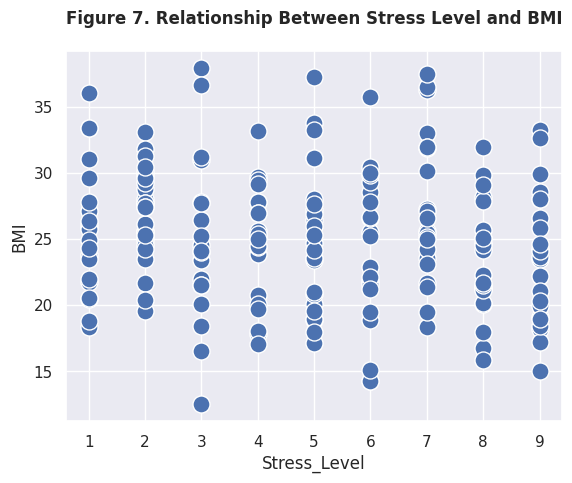

In [73]:
ax = sns.scatterplot(data=df, x='Stress_Level', y='BMI', s=150)
plt.title('Figure 7. Relationship Between Stress Level and BMI', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 8. Relationship Between Exercise Time and Sleep Hours')

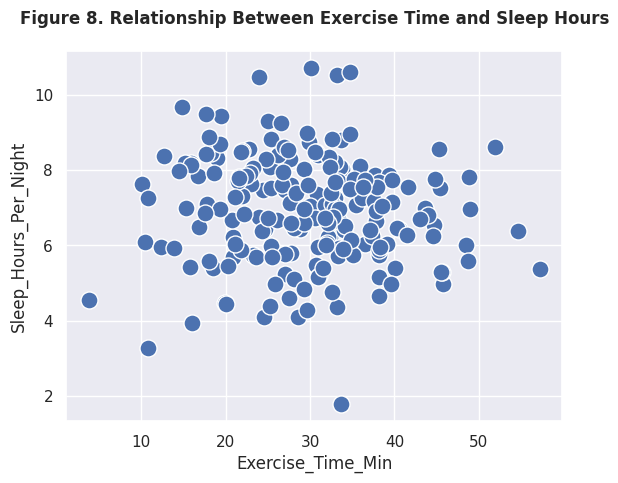

In [74]:
ax = sns.scatterplot(data=df, x='Exercise_Time_Min', y='Sleep_Hours_Per_Night', s=150)
plt.title('Figure 8. Relationship Between Exercise Time and Sleep Hours', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 9. Relationship Between Exercise Time and BMI')

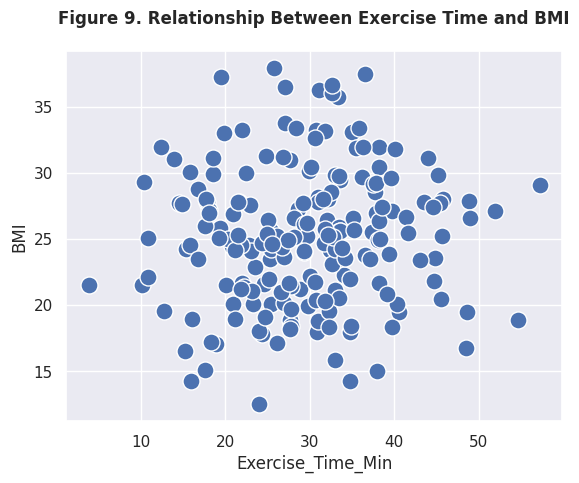

In [75]:
ax = sns.scatterplot(data=df, x='Exercise_Time_Min', y='BMI', s=150)
plt.title('Figure 9. Relationship Between Exercise Time and BMI', fontweight='bold', loc='center', pad=20)
#Possible Clusters

DISCUSSION

Based off the EDA, I believe that possible clusters can be derived here from the BMI vs Excerise_Time_min Scatter plot. It is also an educated assumption that more time spent excersicing should result in a lower BMI and vice versa.

##MODEL DEVELOPMENT

Preprocessing model development

In [76]:
#Prepare the data
df[['Exercise_Time_Min', 'BMI']].describe().round(2)

,Exercise_Time_Min,BMI
count,200.00,200.00
mean,29.59,25.15
std,9.31,5.07
min,3.80,12.50
25%,22.95,21.46
50%,29.96,25.16
75%,35.01,28.01
max,57.20,37.90


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
df_scaled = scaler.fit_transform(df[['Exercise_Time_Min', 'BMI']])
df_scaled = pd.DataFrame(df_scaled, columns = ['Exercise_Time_Min', 'BMI'])
df_scaled.describe().round(2)
#(Nwanganga, 2022)

,Exercise_Time_Min,BMI
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-2.78,-2.50
25%,-0.72,-0.73
50%,0.04,0.00
75%,0.58,0.57
max,2.97,2.52


In [79]:
#Create clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [80]:
km.fit(df_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [81]:
km.labels_

array([0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 0], dtype=int32)

In [82]:
km.inertia_
#WCSS

178.31313040034118

In [83]:
#Evaluate & Visualize clusters
pd.Series(km.labels_).value_counts().sort_index()

,count
0,58
1,81
2,61


In [84]:
km.cluster_centers_

array([[-0.35266267,  1.09122976],
       [-0.55581624, -0.78647705],
       [ 1.07336967,  0.00677566]])

In [85]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Exercise_Time_Min', 'BMI'])
cluster_centers

,Exercise_Time_Min,BMI
0,-0.352663,1.091230
1,-0.555816,-0.786477
2,1.073370,0.006776


Text(0.5, 1.0, 'Figure 8. Relationship Between Exercise Time and BMI by Cluster')

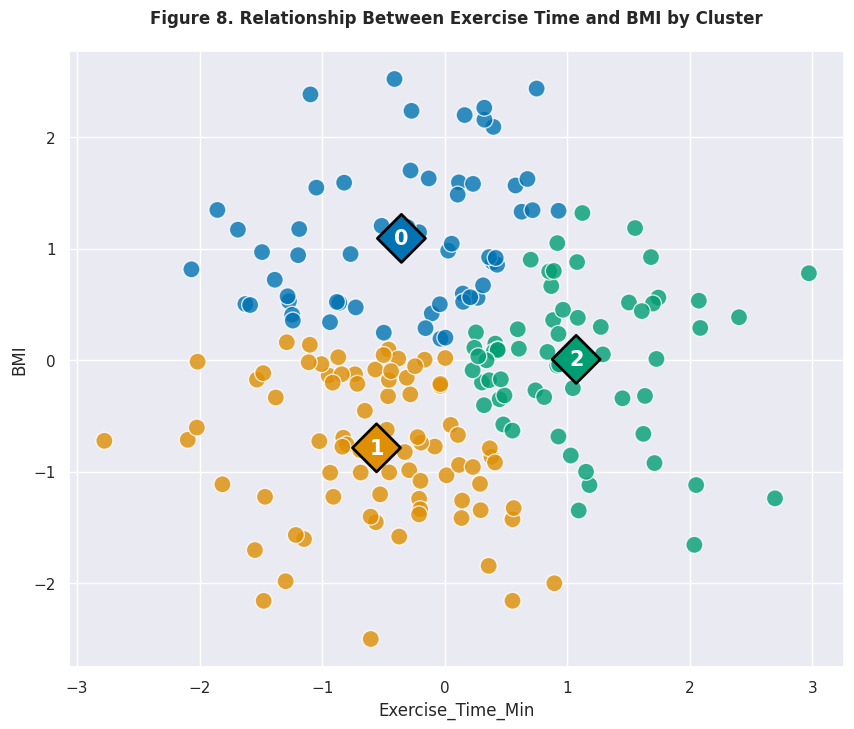

In [86]:
plt.figure(figsize = (10,8))
ax=sns.scatterplot(data=df_scaled, x='Exercise_Time_Min', y='BMI', hue=km.labels_, palette='colorblind', alpha=0.8, s=150, legend=False)
#Plot Centroids
ax = sns.scatterplot(data = cluster_centers, x='Exercise_Time_Min', y='BMI', hue=cluster_centers.index, palette='colorblind', s=600, marker='D', edgecolor='black', legend=False)
#Add labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Exercise_Time_Min[i], y=cluster_centers.BMI[i], s=i, horizontalalignment='center', verticalalignment='center', size=15, weight='bold', color='white')
plt.title('Figure 8. Relationship Between Exercise Time and BMI by Cluster', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

##MODEL EVALUATIONS

Within-Cluster Sum of Squares

Text(0.5, 1.0, 'Figure 10. Relationship Between Exercise Time and BMI by Line Chart')

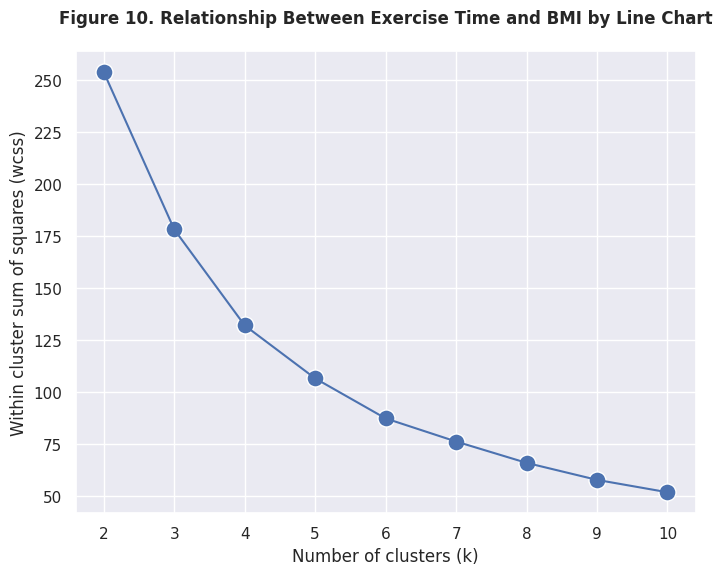

In [87]:
#Evaluate the right number of clusters
wcss = []
for k in range(2,11):
    km=KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

wcss_series=pd.Series(wcss, index=range(2, 11))
plt.figure(figsize=(8, 6))
ax=sns.lineplot(y=wcss_series, x=wcss_series.index)
ax=sns.scatterplot(y=wcss_series, x=wcss_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)', ylabel='Within cluster sum of squares (wcss)')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.title('Figure 10. Relationship Between Exercise Time and BMI by Line Chart', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

We observe the elbow test indicating that the WCSS is no longer significantly decreasing at k=6. Now, let's verify this with the Silhouette score test.

Silhouette Score

Silhouette Scores for k=2 to k=10:
2    0.340
3    0.329
4    0.346
5    0.357
6    0.362
7    0.355
8    0.356
9    0.351
10   0.359


Text(0.5, 1.0, 'Figure 11. Relationship Between Exercise Time and BMI by Line Chart')

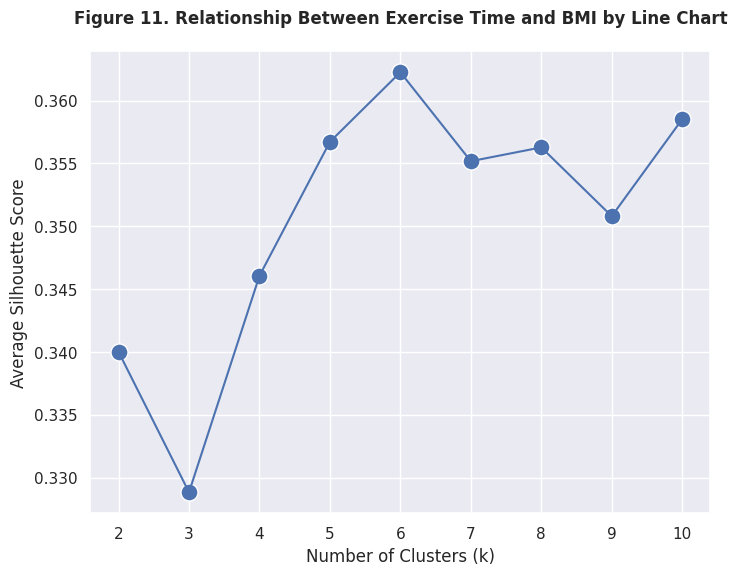

In [88]:
silhouette = []
for k in range (2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index= range(2,11))
print("Silhouette Scores for k=2 to k=10:")
print(silhouette_series.to_string(float_format="%.3f"))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')
plt.title('Figure 11. Relationship Between Exercise Time and BMI by Line Chart', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

In [89]:
#Now we have two opinions that suggest that k=6
#Let's interpret the results; instead of k=3, we'll now do k=6.
km = KMeans (n_clusters = 6, n_init = 25, random_state = 1234)
km.fit(df_scaled)

KMeans(n_clusters=6, n_init=25, random_state=1234)

In [90]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Exercise_Time_Min', 'BMI' ])

##RESULT

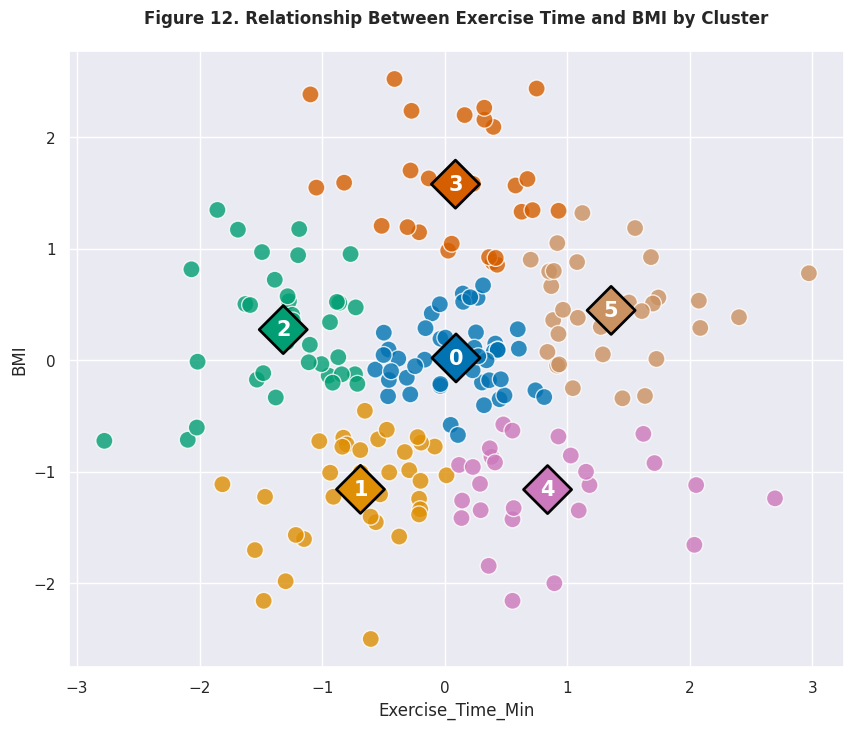

In [91]:
plt.figure(figsize = (10,8))
ax=sns.scatterplot(data=df_scaled, x='Exercise_Time_Min', y='BMI', hue=km.labels_, palette='colorblind', alpha=0.8, s=150, legend=False)
#Plot Centroids
ax = sns.scatterplot(data = cluster_centers, x='Exercise_Time_Min', y='BMI', hue=cluster_centers.index, palette='colorblind', s=600, marker='D', edgecolor='black', legend=False)
#Add labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Exercise_Time_Min[i], y=cluster_centers.BMI[i], s=i, horizontalalignment='center', verticalalignment='center', size=15, weight='bold', color='white')
    plt.title('Figure 12. Relationship Between Exercise Time and BMI by Cluster', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

In [92]:
# Segment original data into 5 clusters and analyze the features and their characteristics
df['Cluster'] = km.labels_.tolist()
df.head(5)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI,Cluster
0,34.967142,5,7.618856,2,33.068556,3
1,28.617357,8,4.105473,7,27.267672,0
2,36.476885,4,6.024123,1,23.779217,0
3,45.230299,1,8.565319,8,29.820436,5
4,27.658466,3,8.301648,3,30.947352,3


In [93]:
df.agg({'Exercise_Time_Min':'mean', 'Healthy_Meals_Per_Day':'mean', 'Sleep_Hours_Per_Night': 'mean', 'Stress_Level': 'mean', 'BMI': 'mean'}).round(2)

,0
Exercise_Time_Min,29.59
Healthy_Meals_Per_Day,2.88
Sleep_Hours_Per_Night,6.93
Stress_Level,5.00
BMI,25.15


In [94]:
df.groupby('Cluster').agg({'Exercise_Time_Min':'mean', 'Healthy_Meals_Per_Day':'mean', 'Sleep_Hours_Per_Night': 'mean', 'Stress_Level': 'mean', 'BMI': 'mean'}).round(2)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
Cluster,,,,,
0,30.46,3.24,6.55,4.65,25.25
1,23.21,2.50,7.05,6.00,19.29
2,17.36,2.74,7.06,4.71,26.53
3,30.41,2.62,7.34,4.62,33.13
4,37.39,3.00,7.09,5.27,19.28
5,42.21,3.03,6.71,4.83,27.40


DISCUSSION

By observing the mean of all features and the cluster assigned to the features we can gain valiable insights. Cluster 4 and 5 are the most active clusters but differ significantly in BMI. Cluster 4 has the lowest BMI whereas cluster 5 has a BMI of 27.40 which is according to WHO, is considered overweight. Even though the other 3 features are similar in cluster 4 and 5, this suggests that other possible features not within the data set like age and gender could impact BMI scores. This can be supported by observing cluster 1, with the lowest BMI score of 19.29, it has the 2nd lowest excerice time of 23.21.

##MODEL COMPARISON WITH PCA

In [95]:
#PCA
df_scaled['Cluster'] = df['Cluster']
df_scaled.head()

,Exercise_Time_Min,BMI,Cluster
0,0.578767,1.565523,3
1,-0.104981,0.418669,0
2,0.741336,-0.271010,0
3,1.683908,0.923359,5
4,-0.208235,1.146154,3


In [96]:
X_dim_reduction = df_scaled[['Exercise_Time_Min', 'BMI']]

In [97]:
scaler_dim_reduction = StandardScaler()
X_scaled_dim_reduction = scaler_dim_reduction.fit_transform(X_dim_reduction)

In [98]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled_dim_reduction)

In [99]:
df_scaled['PCA_Components_1'] = X_pca[:, 0]
df_scaled['PCA_Components_2'] = X_pca[:, 1]
df_scaled.head()

,Exercise_Time_Min,BMI,Cluster,PCA_Components_1,PCA_Components_2
0,0.578767,1.565523,3,1.516242,-0.697742
1,-0.104981,0.418669,0,0.221811,-0.370277
2,0.741336,-0.271010,0,0.332571,0.715837
3,1.683908,0.923359,5,1.843616,0.537790
4,-0.208235,1.146154,3,0.663209,-0.957698


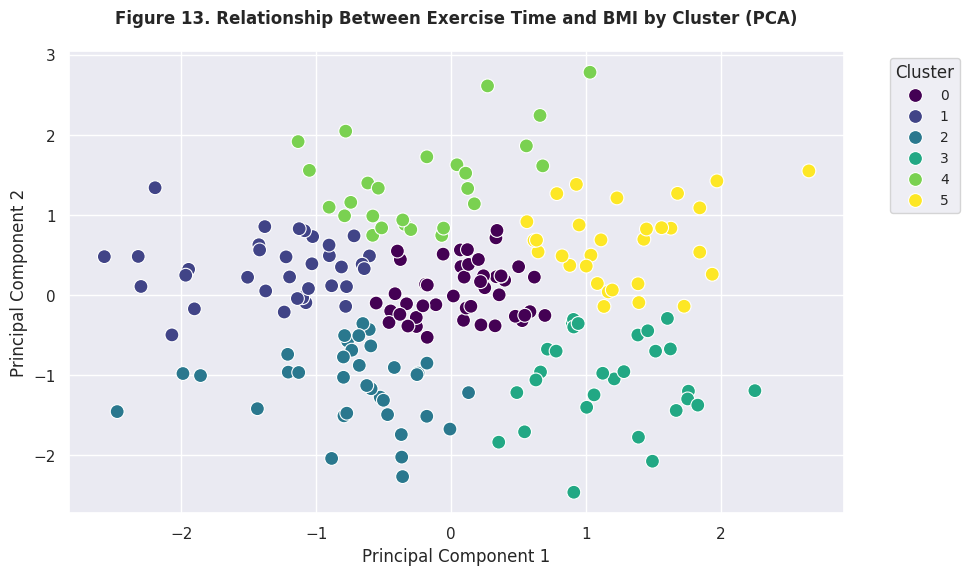

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Components_1', y='PCA_Components_2',hue='Cluster',
    palette='viridis', data=df_scaled, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Figure 13. Relationship Between Exercise Time and BMI by Cluster (PCA)', fontweight='bold', loc='center', pad=20)
plt.legend(title='Cluster', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#(Oyewusi, 2025)

In [101]:
pca.explained_variance_ratio_

array([0.53447712, 0.46552288])

In [102]:
pca.explained_variance_ratio_.sum()

np.float64(1.0)

In [103]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['Exercise_Time_Min', 'BMI'])
print(loadings)

                        PC1       PC2
Exercise_Time_Min  0.707107  0.707107
BMI                0.707107 -0.707107


In [104]:
# Fit K-Means on PCA components
km_pca = KMeans(n_clusters=6, n_init=25, random_state=1234)
km_pca.fit(df_scaled[['PCA_Components_1', 'PCA_Components_2']])
pca_labels = km_pca.labels_

pca_score = silhouette_score(df_scaled[['PCA_Components_1', 'PCA_Components_2']], pca_labels)
print(f'Silhouette Score (PCA): {pca_score:.3f}')
#(Oyewusi, 2025)

Silhouette Score (PCA): 0.362


DISCUSSION

Both PC1 and PC2 are near equal portions of the variance. This is evident as I used two features. PC1 (53.4%) reflects that both Exercise and BMI increase together at +0.707. Possible outcomes are that people who exercise more and have higher BMIs are muscular individuals. PC2 (46.6%) reflects the opposite. People in PC2 exercise more and have lower BMIs. This nearly 50/50 split indicates that there's no singular dominant relationship that exists between exercise and BMI within the dataset. Future steps should include incorporating more features such as sleep hours and or healthy meals to try and better explain these insights and patterns.

CONCLUSION

The relationship between exercise and BMIs can indicate crucial health risks associated with obesity and physical inactivity. Exercise is one of the most important components of the overall approach to treating obesity (Okay et al., 2009). This was examined in this lab report using K-Means clustering and PCA. The WCSS and Silhouette score was used to determine the ideal number of clusters (k=6), which revealed discrete patient groupings with different risk profiles. In my paper, I will suggest wellness programs for segmented clusters.

REFERENCES

Itauma, I. (2024). Machine Learning using Python - 4  Chapter 4: Unsupervised Learning - Clustering and Dimensionality Reduction. Quarto.pub. https://amightyo.quarto.pub/machine-learning-using-python/Chapter_4.html#dimensionality-reduction

Nwanganga, F. (2022, May 23). How to segment data with k-means clustering in Python - Machine Learning with Python: k-Means Clustering. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering/how-to-segment-data-with-k-means-clustering-in-python?autoSkip=true&leis=LTI13&resume=false&u=279222306

Okay, D. M., Jackson, P. V., Marcinkiewicz, M., & Papino, M. N. (2009). Exercise and Obesity. Primary Care: Clinics in Office Practice, 36(2), 379–393. https://doi.org/10.1016/j.pop.2009.01.008  

Oyewusi, W. (2025). Machine Learning Fundamentals for Healthcare. Linkedin.com. https://www.linkedin.com/learning/machine-learning-fundamentals-for-healthcare/dimensionality-reduction-localization-data-for-person-activity?autoSkip=true&leis=LTI13&resume=false&u=279222306

Sharma, P. (2019, August 19). An Introduction to K-Means Clustering. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h-objective-of-k-means-clustering

World Health Organization. (2024). Physical Activity. World Health Organization. https://www.who.int/health-topics/physical-activity#tab=tab_1   

World Health Organization. (2025). Obesity. World Health Organization. https://www.who.int/health-topics/obesity#tab=tab_1  
